In [1]:
### force keras to use CPU instead of GPU
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
%cd '/home/ubuntu/project-phishing/src/keras-yolo3'

/home/ubuntu/project-phishing/src/keras-yolo3


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

## image similarity within brands

In [355]:
all_images = [ os.path.join(r, file) for r, folders, filenames in os.walk('../../data_litw/LogosInTheWild-v2/data_cleaned/brandROIs/google-text/') for file in filenames]
img_data = []

for img_path in all_images:
    img = image.load_img(img_path, target_size=(224, 224))
    
    img_data.append(image.img_to_array(img))

img_data = preprocess_input(np.array(img_data))
img_data.shape

features = model.predict(img_data)

cc = cosine_similarity(features.reshape(features.shape[0], np.prod(features.shape[-3:])))

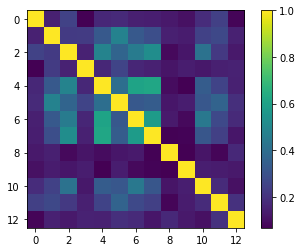

In [356]:
plt.imshow(cc);
plt.colorbar();

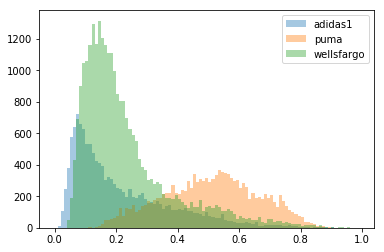

In [366]:
for target in ['adidas1', 'puma', 'wellsfargo']:
    all_images = [ os.path.join(r, file) for r, folders, filenames in os.walk(os.path.join('../../data_litw/LogosInTheWild-v2/data_cleaned/brandROIs/',target)) for file in filenames]
    img_data = []

    for img_path in all_images:
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_data.append(image.img_to_array(img))
            
        except:
            continue

    img_data = preprocess_input(np.array(img_data))
    img_data.shape

    features = model.predict(img_data)

    cc = cosine_similarity(features.reshape(features.shape[0], np.prod(features.shape[-3:])))

    plt.hist(cc.ravel(), bins=np.arange(0,1,0.01), alpha=0.4, label=target)
plt.legend();

## image similarity on out of set Lexus image

In [3]:
! wget "http://www.car-logos.org/wp-content/uploads/2011/09/lexus.png" -O test_lexus.png
! wget "https://i.ebayimg.com/images/g/sjgAAOSwBt5ZFa0Z/s-l640.jpg"  -O test_lexus1.png

--2019-02-01 07:01:29--  http://www.car-logos.org/wp-content/uploads/2011/09/lexus.png
Resolving www.car-logos.org (www.car-logos.org)... 162.254.255.98
Connecting to www.car-logos.org (www.car-logos.org)|162.254.255.98|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14827 (14K) [image/png]
Saving to: ‘test_lexus.png’

test_lexus.png      100%[===================>]  14.48K  --.-KB/s    in 0.06s   

2019-02-01 07:01:30 (235 KB/s) - ‘test_lexus.png’ saved [14827/14827]

--2019-02-01 07:01:30--  https://i.ebayimg.com/images/g/sjgAAOSwBt5ZFa0Z/s-l640.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 23.199.224.241, 2600:1409:a:186::24d4, 2600:1409:a:1a1::24d4
Connecting to i.ebayimg.com (i.ebayimg.com)|23.199.224.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18174 (18K) [image/jpeg]
Saving to: ‘test_lexus1.png’

test_lexus1.png     100%[===================>]  17.75K  --.-KB/s    in 0s      

2019-02-01 07:01:31 (88.5 MB/s) - ‘test_lexus

(1, 7, 7, 512)


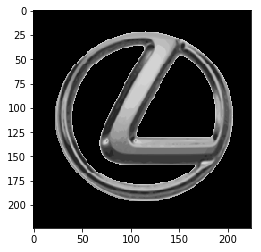

In [4]:
img_path = 'test_lexus.png'
img = image.load_img(img_path, target_size=(224, 224))

img_data = image.img_to_array(img)
plt.imshow(img_data/255)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

(1, 7, 7, 512)


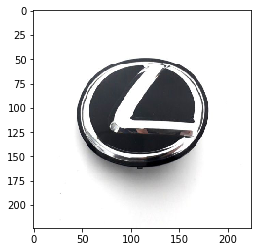

In [133]:
img_path = 'test_lexus1.png'
img = image.load_img(img_path, target_size=(224, 224))

img_data1 = image.img_to_array(img)
plt.imshow(img_data1/255)
img_data1 = np.expand_dims(img_data1, axis=0)
img_data1 = preprocess_input(img_data1)

vgg16_feature = model.predict(img_data1)

print(vgg16_feature.shape)

YOLO on test9.jpg:
```
logo 0.34 (567, 458) (596, 467)
logo 0.90 (87, 243) (116, 271)
```

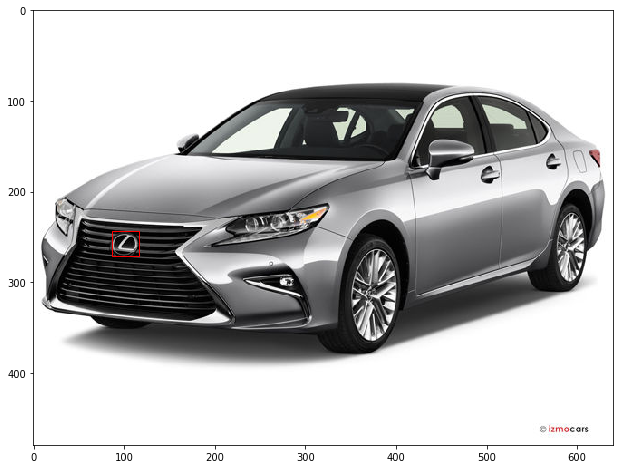

In [5]:
img_yo = image.img_to_array(image.load_img('test9.jpg'))
plt.imshow(img_yo/255);
plt.gca().add_patch(mpl.patches.Rectangle((87,243),116-87, 271-243, edgecolor='r',facecolor=(0,0,0,0)))
plt.gcf().set_size_inches(16, 8);

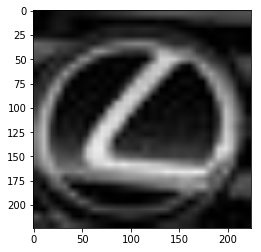

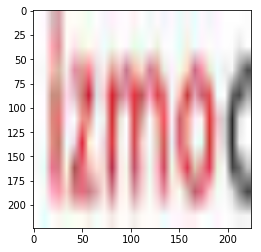

In [135]:
import cv2
candidate = img_yo[243:272, 87:117]
candidate = cv2.resize(candidate, (224, 224)) 
plt.imshow(candidate/255)
candidate = np.expand_dims(candidate, axis=0)
candidate = preprocess_input(candidate)
plt.show()
candidate2 = img_yo[458:467, 567:596]
candidate2 = cv2.resize(candidate2, (224, 224)) 
plt.imshow(candidate2/255);
candidate2 = np.expand_dims(candidate2, axis=0)
candidate2 = preprocess_input(candidate2)

In [138]:
feature_c = model.predict(np.vstack([img_data, img_data1, candidate, candidate2]))

In [140]:
cc = cosine_similarity(feature_c.reshape(feature_c.shape[0],np.prod(feature_c.shape[-3:])))

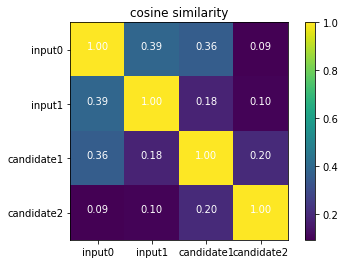

In [144]:
im = plt.imshow(cc);
[plt.text(i,j,'{:.2f}'.format(cc[i,j]), color='w', ha='center') for i in range(len(cc)) for j in range(len(cc))]
plt.colorbar(im);
plt.gca().set(xticks=range(len(cc)),xticklabels=['input0','input1','candidate1','candidate2'], 
              yticks=range(len(cc)),yticklabels=['input0','input1','candidate1','candidate2'], title='cosine similarity');

Make a random selection of cutouts of the image, see how does the cosine similarity compares.

In [145]:
np.random.seed(0)
cutouts = []
for _ in range(20):
    y, x = [ np.random.randint(20, n)  for n in img_yo.shape[:2]-np.array([30,30])]
    h, w = [ np.random.randint(30, min(224,max(30,n)))  for n in np.array(img_yo.shape[:2])-np.array([y,x])]
    
    cutouts += [[x, x+w, y, y+h]]
cutouts = np.array(cutouts)

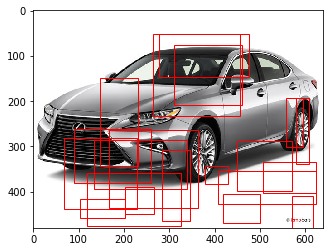

In [146]:
plt.imshow(img_yo/255);
for i, (x, x1, y, y1) in enumerate(cutouts):
    plt.gca().add_patch(mpl.patches.Rectangle((x,y), x1-x, y1-y, edgecolor='r',facecolor=(0,0,0,0)))

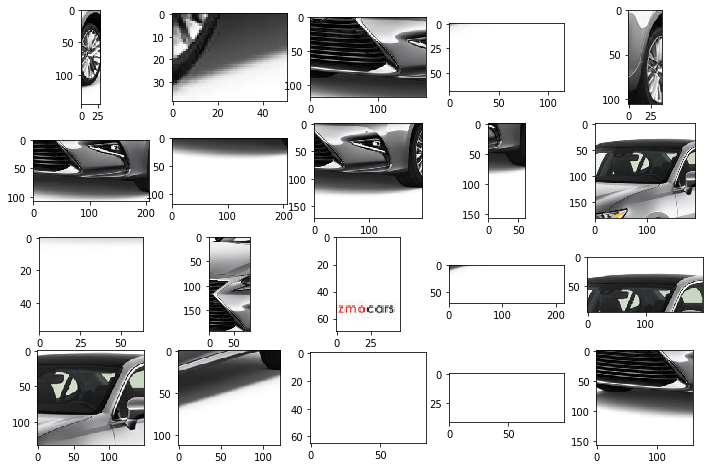

In [147]:
fig,axes = plt.subplots(4,5,figsize=(12,8))
for i, (x, x1, y, y1) in enumerate(cutouts):
    axes[i//5,i%5].imshow(img_yo[y:y1, x:x1]/255)
#     plt.show()

In [126]:
cand_vec = []
for x, x1, y, y1 in cutouts:
    xpad, ypad = 224-(x1-x), 224-(y1-y)
    xpad = (xpad//2, xpad//2+xpad%2)
    ypad = (ypad//2, ypad//2+ypad%2)
    cand_vec.append(np.pad(img_yo[y:y1, x:x1], pad_width=(ypad, xpad,(0,0)), mode='edge'))
cand_vec = np.array(cand_vec)

In [148]:
cand_vec = preprocess_input(cand_vec)
feature_c = model.predict(np.vstack([img_data, img_data1, candidate, candidate2, cand_vec]))

In [150]:
cc = cosine_similarity(feature_c.reshape(feature_c.shape[0], np.prod(feature_c.shape[-3:])))

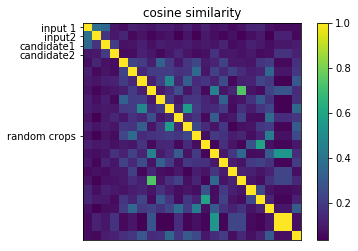

In [151]:
im = plt.imshow(cc);
# [plt.text(i,j,'{:.2f}'.format(cc[i,j]), color='w', ha='center') for i in range(22) for j in range(22)]
plt.colorbar(im);
plt.gca().set(xticks=[], yticks=list(range(4))+[len(cc)/2],yticklabels=['input 1','input2','candidate1','candidate2','random crops'], title='cosine similarity');

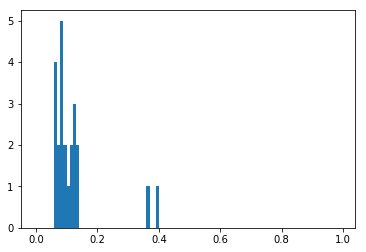

In [153]:
plt.hist(cc[0,1:], bins=np.arange(0,1,0.01));

## image similarity on kemei

In [154]:
! wget "https://uidesign.gbtcdn.com/GB/images/index/2017/brand_banner/kemei/kemei.jpg" -O test_kemei.jpg

--2019-02-01 09:22:10--  https://uidesign.gbtcdn.com/GB/images/index/2017/brand_banner/kemei/kemei.jpg
Resolving uidesign.gbtcdn.com (uidesign.gbtcdn.com)... 23.57.1.32
Connecting to uidesign.gbtcdn.com (uidesign.gbtcdn.com)|23.57.1.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2216 (2.2K) [image/jpeg]
Saving to: ‘test_kemei.jpg’

test_kemei.jpg      100%[===================>]   2.16K  --.-KB/s    in 0s      

Last-modified header invalid -- time-stamp ignored.
2019-02-01 09:22:11 (447 MB/s) - ‘test_kemei.jpg’ saved [2216/2216]



(1, 7, 7, 512)


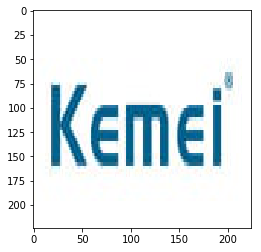

In [180]:
img_path = 'test_kemei.jpg'
img = image.load_img(img_path, target_size=(224, 224))

img_data = image.img_to_array(img)
plt.imshow(img_data/255)
img_data = np.expand_dims(1-img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

YOLO on test4.jpg:
```
logo 0.84 (608, 484) (733, 575)
```

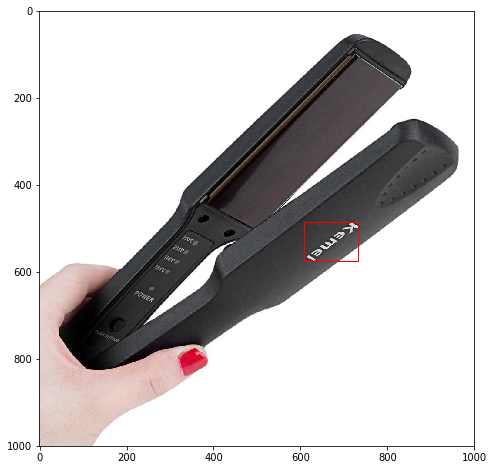

In [158]:
img_yo = image.img_to_array(image.load_img('test4.jpg'))
plt.imshow(img_yo/255);
plt.gca().add_patch(mpl.patches.Rectangle((608, 484), 733-608, 575-484, edgecolor='r',facecolor=(0,0,0,0)))
plt.gcf().set_size_inches(16, 8);

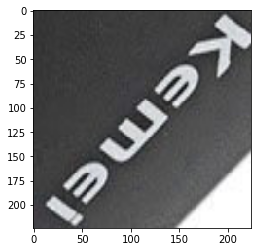

In [159]:
import cv2
candidate = img_yo[484:575, 608:733]
candidate = cv2.resize(candidate, (224, 224)) 
plt.imshow(candidate/255)
candidate = np.expand_dims(candidate, axis=0)
candidate = preprocess_input(candidate)

In [181]:
feature_c = model.predict(np.vstack([img_data, candidate]))

In [161]:
from sklearn.metrics.pairwise import cosine_similarity

In [183]:
cc = cosine_similarity(feature_c.reshape(feature_c.shape[0],np.prod(feature_c.shape[-3:])))
cc

array([[0.99999976, 0.21694253],
       [0.21694253, 1.0000001 ]], dtype=float32)

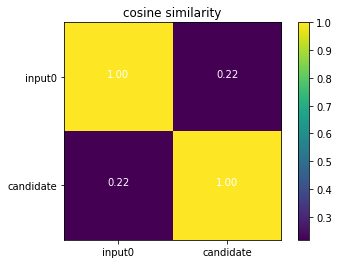

In [184]:
im = plt.imshow(cc);
[plt.text(i,j,'{:.2f}'.format(cc[i,j]), color='w', ha='center') for i in range(len(cc)) for j in range(len(cc))]
plt.colorbar(im);
plt.gca().set(xticks=range(len(cc)),xticklabels=['input0','candidate'], 
              yticks=range(len(cc)),yticklabels=['input0','candidate'], title='cosine similarity');

Make a random selection of cutouts of the image, see how does the cosine similarity compares.

In [165]:
np.random.seed(0)
cutouts = []
for _ in range(20):
    y, x = [ np.random.randint(20, n)  for n in img_yo.shape[:2]-np.array([30,30])]
    h, w = [ np.random.randint(30, min(224,max(30,n)))  for n in np.array(img_yo.shape[:2])-np.array([y,x])]
    
    cutouts += [[x, x+w, y, y+h]]
cutouts = np.array(cutouts)

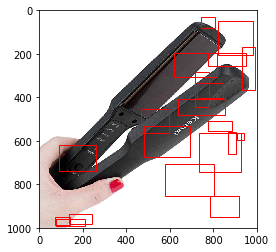

In [166]:
plt.imshow(img_yo/255);
for i, (x, x1, y, y1) in enumerate(cutouts):
    plt.gca().add_patch(mpl.patches.Rectangle((x,y), x1-x, y1-y, edgecolor='r',facecolor=(0,0,0,0)))

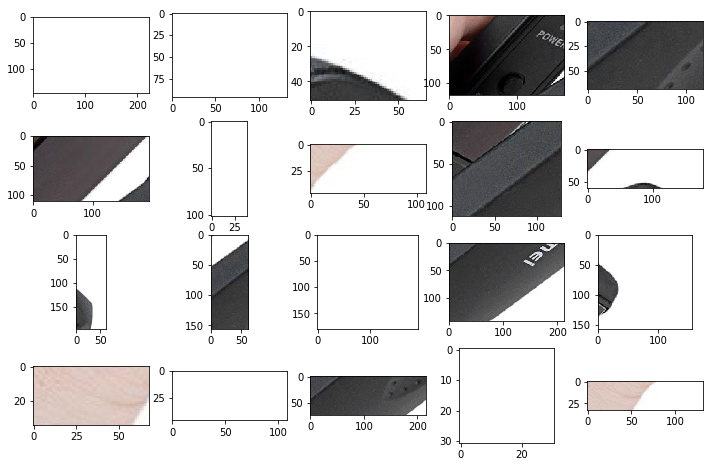

In [167]:
fig,axes = plt.subplots(4,5,figsize=(12,8))
for i, (x, x1, y, y1) in enumerate(cutouts):
    axes[i//5,i%5].imshow(img_yo[y:y1, x:x1]/255)
#     plt.show()

In [168]:
cand_vec = []
for x, x1, y, y1 in cutouts:
    xpad, ypad = 224-(x1-x), 224-(y1-y)
    xpad = (xpad//2, xpad//2+xpad%2)
    ypad = (ypad//2, ypad//2+ypad%2)
    cand_vec.append(np.pad(img_yo[y:y1, x:x1], pad_width=(ypad, xpad,(0,0)), mode='edge'))
cand_vec = np.array(cand_vec)

In [185]:
cand_vec = preprocess_input(cand_vec)
feature_c = model.predict(np.vstack([img_data, candidate, cand_vec]))

In [186]:
cc = cosine_similarity(feature_c.reshape(feature_c.shape[0], np.prod(feature_c.shape[-3:])))

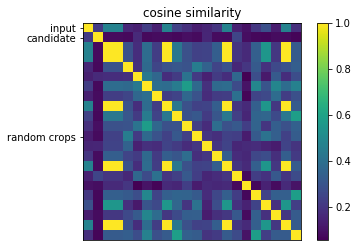

In [187]:
im = plt.imshow(cc);
# [plt.text(i,j,'{:.2f}'.format(cc[i,j]), color='w', ha='center') for i in range(22) for j in range(22)]
plt.colorbar(im);
plt.gca().set(xticks=[], yticks=list(range(2))+[len(cc)/2],yticklabels=['input','candidate','random crops'], title='cosine similarity');

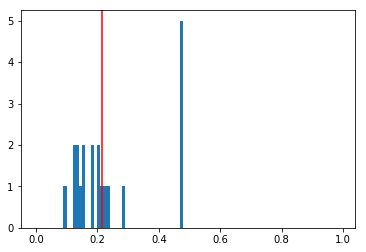

In [193]:
plt.hist(cc[0,1:], bins=np.arange(0,1,0.01));
plt.axvline(cc[0,1],c='r');

## image similarity on Batman and Robin

In [247]:
! wget "https://i5.walmartimages.com/asr/9ac92e68-6836-40cb-873b-32b4f100dc03_1.6de0d13c614576428e13535bdd2b9911.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF" -O test_robin.jpg

--2019-02-01 10:03:05--  https://i5.walmartimages.com/asr/9ac92e68-6836-40cb-873b-32b4f100dc03_1.6de0d13c614576428e13535bdd2b9911.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF
Resolving i5.walmartimages.com (i5.walmartimages.com)... 23.198.159.230, 2606:4700::6812:621f, 2606:4700::6812:631f
Connecting to i5.walmartimages.com (i5.walmartimages.com)|23.198.159.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24971 (24K) [image/jpeg]
Saving to: ‘test_robin.jpg’

test_robin.jpg      100%[===================>]  24.39K  --.-KB/s    in 0.007s  

2019-02-01 10:03:05 (3.50 MB/s) - ‘test_robin.jpg’ saved [24971/24971]



(1, 7, 7, 512)


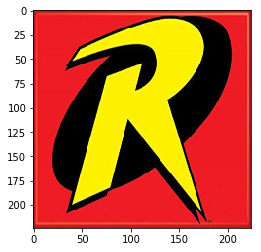

In [248]:
img_path = 'test_robin.jpg'
img = image.load_img(img_path, target_size=(224, 224))

img_data = image.img_to_array(img)
plt.imshow(img_data/255)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

YOLO on test4.jpg:
```
logo 0.33 (1117, 539) (1183, 637)
logo 0.94 (584, 435) (826, 470)
```

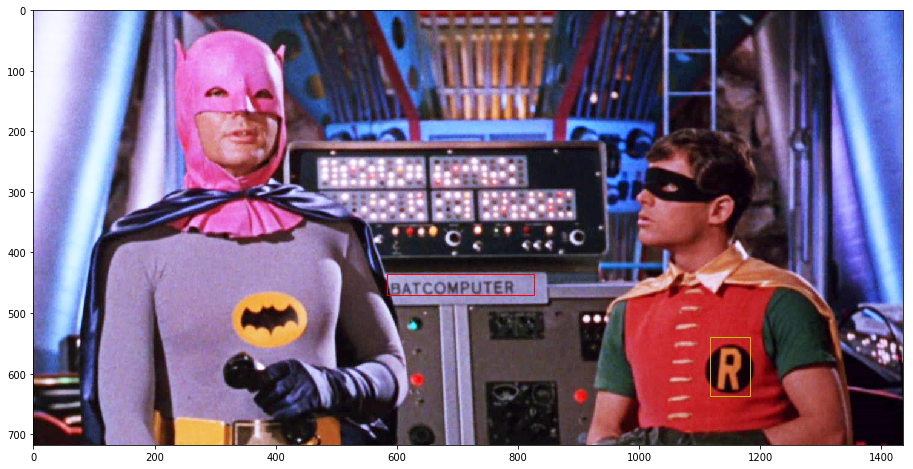

In [201]:
img_yo = image.img_to_array(image.load_img('test11.jpg'))
plt.imshow(img_yo/255);
plt.gca().add_patch(mpl.patches.Rectangle((1117,539), 1183-1117, 637-539, edgecolor='y',facecolor=(0,0,0,0)))
plt.gca().add_patch(mpl.patches.Rectangle((584,435), 826-584, 470-435, edgecolor='r',facecolor=(0,0,0,0)))
plt.gcf().set_size_inches(16, 8);

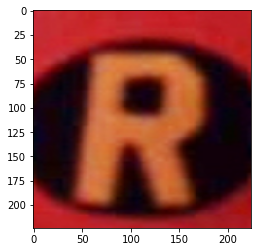

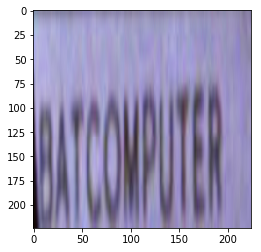

In [204]:
import cv2
candidate = img_yo[539:637, 1117:1183]
candidate = cv2.resize(candidate, (224, 224)) 
plt.imshow(candidate/255)
candidate = np.expand_dims(candidate, axis=0)
candidate = preprocess_input(candidate)
plt.show()
candidate2 = img_yo[435:470, 584:826 ]
candidate2 = cv2.resize(candidate2, (224, 224)) 
plt.imshow(candidate2/255);
candidate2 = np.expand_dims(candidate2, axis=0)
candidate2 = preprocess_input(candidate2)

In [249]:
feature_c = model.predict(np.vstack([img_data, candidate]))

In [206]:
from sklearn.metrics.pairwise import cosine_similarity

In [250]:
cc = cosine_similarity(feature_c.reshape(feature_c.shape[0],np.prod(feature_c.shape[-3:])))
cc

array([[1.       , 0.1186465],
       [0.1186465, 1.0000006]], dtype=float32)

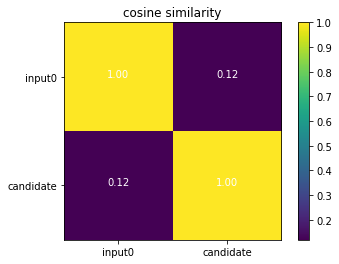

In [251]:
im = plt.imshow(cc);
[plt.text(i,j,'{:.2f}'.format(cc[i,j]), color='w', ha='center') for i in range(len(cc)) for j in range(len(cc))]
plt.colorbar(im);
plt.gca().set(xticks=range(len(cc)),xticklabels=['input0','candidate'], 
              yticks=range(len(cc)),yticklabels=['input0','candidate'], title='cosine similarity');

Make a random selection of cutouts of the image, see how does the cosine similarity compares.

In [224]:
np.random.seed(0)
cutouts = []
for _ in range(50):
    y, x = [ np.random.randint(20, n)  for n in img_yo.shape[:2]-np.array([30,30])]
    h, w = [ np.random.randint(30, min(224,max(30,n)))  for n in np.array(img_yo.shape[:2])-np.array([y,x])]
    
    cutouts += [[x, x+w, y, y+h]]
cutouts = np.array(cutouts)

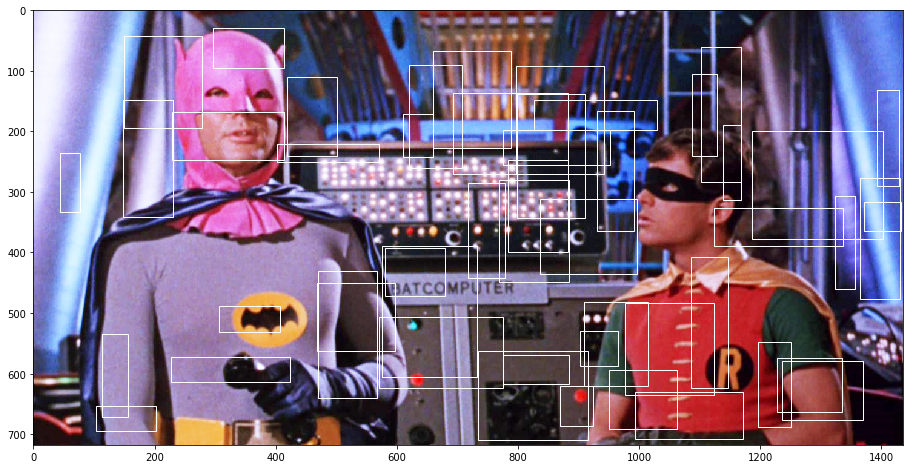

In [227]:
plt.imshow(img_yo/255);
for i, (x, x1, y, y1) in enumerate(cutouts):
    plt.gca().add_patch(mpl.patches.Rectangle((x,y), x1-x, y1-y, edgecolor='w',facecolor=(0,0,0,0)))
plt.gcf().set_size_inches(16, 8);

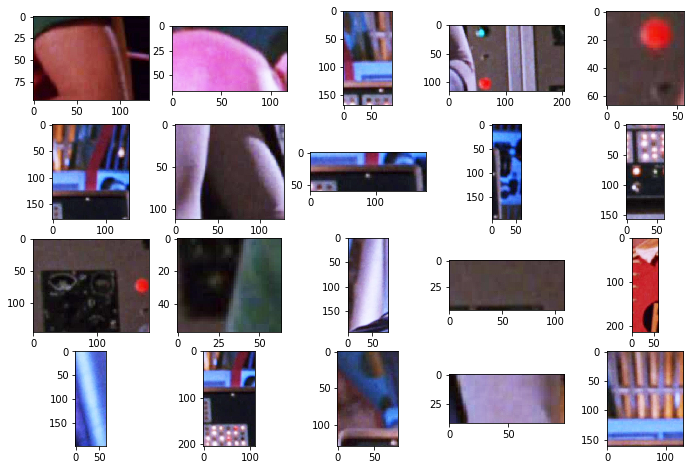

In [228]:
fig,axes = plt.subplots(4,5,figsize=(12,8))
for i, (x, x1, y, y1) in enumerate(cutouts[:20]):
    axes[i//5,i%5].imshow(img_yo[y:y1, x:x1]/255)
#     plt.show()

In [229]:
cand_vec = []
for x, x1, y, y1 in cutouts:
    xpad, ypad = 224-(x1-x), 224-(y1-y)
    xpad = (xpad//2, xpad//2+xpad%2)
    ypad = (ypad//2, ypad//2+ypad%2)
    cand_vec.append(np.pad(img_yo[y:y1, x:x1], pad_width=(ypad, xpad,(0,0)), mode='edge'))
cand_vec = np.array(cand_vec)

In [252]:
cand_vec = preprocess_input(cand_vec)
feature_c = model.predict(np.vstack([img_data, candidate, candidate2, cand_vec]))

In [253]:
cc = cosine_similarity(feature_c.reshape(feature_c.shape[0], np.prod(feature_c.shape[-3:])))

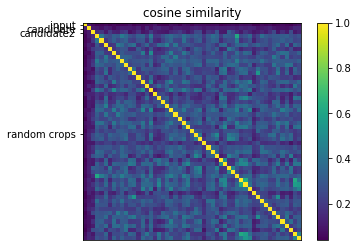

In [254]:
im = plt.imshow(cc);
# [plt.text(i,j,'{:.2f}'.format(cc[i,j]), color='w', ha='center') for i in range(22) for j in range(22)]
plt.colorbar(im);
plt.gca().set(xticks=[], yticks=list(range(3))+[len(cc)/2],yticklabels=['input','candidate','candidate2','random crops'], title='cosine similarity');

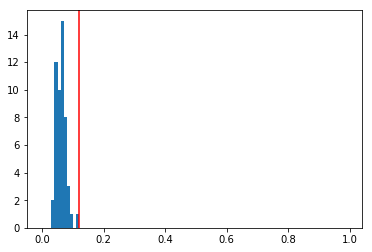

In [255]:
plt.hist(cc[0,1:], bins=np.arange(0,1,0.01));
plt.axvline(cc[0,1],c='r');

## image similarity on Duff beer

In [256]:
! wget "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTH_47orLgQUOZDoti3WGs8LULxnh9SXYB3CYM--wzDCjElUClx" -O test_duff.jpg

--2019-02-01 10:11:06--  https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTH_47orLgQUOZDoti3WGs8LULxnh9SXYB3CYM--wzDCjElUClx
Resolving encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)... 172.217.14.238, 2607:f8b0:400a:804::200e
Connecting to encrypted-tbn0.gstatic.com (encrypted-tbn0.gstatic.com)|172.217.14.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8261 (8.1K) [image/jpeg]
Saving to: ‘test_duff.jpg’

test_duff.jpg       100%[===================>]   8.07K  --.-KB/s    in 0.001s  

2019-02-01 10:11:06 (7.02 MB/s) - ‘test_duff.jpg’ saved [8261/8261]



(1, 7, 7, 512)


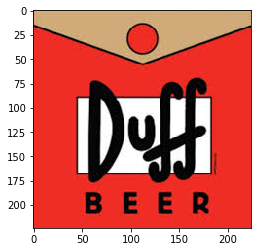

In [257]:
img_path = 'test_duff.jpg'
img = image.load_img(img_path, target_size=(224, 224))

img_data = image.img_to_array(img)
plt.imshow(img_data/255)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

print(vgg16_feature.shape)

YOLO on test4.jpg:
```
logo 0.37 (258, 627) (470, 813)
logo 0.38 (299, 257) (404, 297)
logo 0.82 (513, 587) (695, 760)
logo 0.98 (67, 582) (241, 738)
```

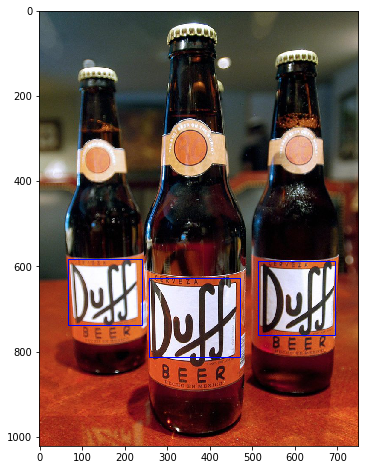

In [262]:
img_yo = image.img_to_array(image.load_img('test12.jpg'))
plt.imshow(img_yo/255);
plt.gca().add_patch(mpl.patches.Rectangle((513, 587), 695-513, 760-587, edgecolor='b',facecolor=(0,0,0,0)))
plt.gca().add_patch(mpl.patches.Rectangle((67, 582), 241-67, 738-582, edgecolor='b',facecolor=(0,0,0,0)))
plt.gca().add_patch(mpl.patches.Rectangle((258, 627), 470-258, 813-627, edgecolor='b',facecolor=(0,0,0,0)))
plt.gcf().set_size_inches(16, 8);

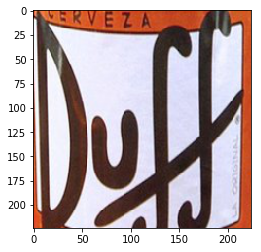

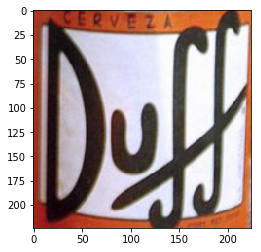

In [264]:
import cv2
candidate = img_yo[627:813, 258:470 ]
candidate = cv2.resize(candidate, (224, 224)) 
plt.imshow(candidate/255)
candidate = np.expand_dims(candidate, axis=0)
candidate = preprocess_input(candidate)
plt.show()
candidate2 = img_yo[587:760, 513:695 ]
candidate2 = cv2.resize(candidate2, (224, 224)) 
plt.imshow(candidate2/255);
candidate2 = np.expand_dims(candidate2, axis=0)
candidate2 = preprocess_input(candidate2)

In [265]:
feature_c = model.predict(np.vstack([img_data, candidate, candidate2]))

In [266]:
from sklearn.metrics.pairwise import cosine_similarity

In [267]:
cc = cosine_similarity(feature_c.reshape(feature_c.shape[0],np.prod(feature_c.shape[-3:])))
cc

array([[0.99999964, 0.22660433, 0.22948705],
       [0.22660433, 0.99999994, 0.5442058 ],
       [0.22948705, 0.5442058 , 1.0000005 ]], dtype=float32)

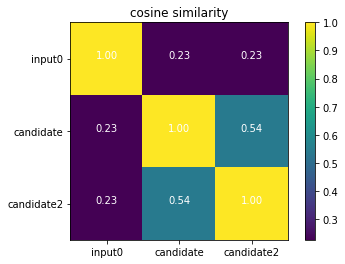

In [270]:
im = plt.imshow(cc);
[plt.text(i,j,'{:.2f}'.format(cc[i,j]), color='w', ha='center') for i in range(len(cc)) for j in range(len(cc))]
plt.colorbar(im);
plt.gca().set(xticks=range(len(cc)),xticklabels=['input0','candidate','candidate2'], 
              yticks=range(len(cc)),yticklabels=['input0','candidate','candidate2'], title='cosine similarity');

Make a random selection of cutouts of the image, see how does the cosine similarity compares.

In [271]:
np.random.seed(0)
cutouts = []
for _ in range(50):
    y, x = [ np.random.randint(20, n)  for n in img_yo.shape[:2]-np.array([30,30])]
    h, w = [ np.random.randint(30, min(224,max(30,n)))  for n in np.array(img_yo.shape[:2])-np.array([y,x])]
    
    cutouts += [[x, x+w, y, y+h]]
cutouts = np.array(cutouts)

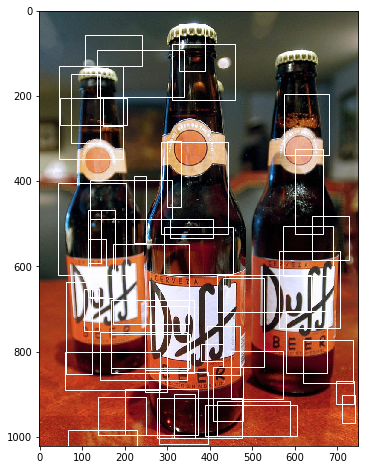

In [272]:
plt.imshow(img_yo/255);
for i, (x, x1, y, y1) in enumerate(cutouts):
    plt.gca().add_patch(mpl.patches.Rectangle((x,y), x1-x, y1-y, edgecolor='w',facecolor=(0,0,0,0)))
plt.gcf().set_size_inches(16, 8);

In [273]:
cand_vec = []
for x, x1, y, y1 in cutouts:
    xpad, ypad = 224-(x1-x), 224-(y1-y)
    xpad = (xpad//2, xpad//2+xpad%2)
    ypad = (ypad//2, ypad//2+ypad%2)
    cand_vec.append(np.pad(img_yo[y:y1, x:x1], pad_width=(ypad, xpad,(0,0)), mode='edge'))
cand_vec = np.array(cand_vec)

In [274]:
cand_vec = preprocess_input(cand_vec)
feature_c = model.predict(np.vstack([img_data, candidate, candidate2, cand_vec]))

In [275]:
cc = cosine_similarity(feature_c.reshape(feature_c.shape[0], np.prod(feature_c.shape[-3:])))

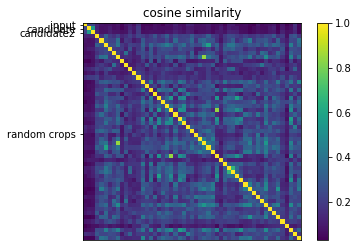

In [276]:
im = plt.imshow(cc);
# [plt.text(i,j,'{:.2f}'.format(cc[i,j]), color='w', ha='center') for i in range(22) for j in range(22)]
plt.colorbar(im);
plt.gca().set(xticks=[], yticks=list(range(3))+[len(cc)/2],yticklabels=['input','candidate','candidate2','random crops'], title='cosine similarity');

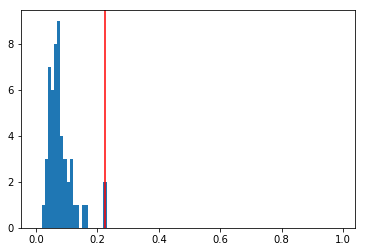

In [277]:
plt.hist(cc[0,1:], bins=np.arange(0,1,0.01));
plt.axvline(cc[0,1],c='r');